In [5]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [7]:
# Download zip
import os
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL)

# Manually unzip
import zipfile

zip_ref = zipfile.ZipFile(path_to_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

# Set paths
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Check
print("Train dir:", train_dir)
print("Train subfolders:", os.listdir(train_dir))
print("Validation dir:", validation_dir)
print("Validation subfolders:", os.listdir(validation_dir))


Train dir: /content/cats_and_dogs_filtered/train
Train subfolders: ['cats', 'dogs']
Validation dir: /content/cats_and_dogs_filtered/validation
Validation subfolders: ['cats', 'dogs']


In [4]:
['cats', 'dogs']



['cats', 'dogs']

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6867 - loss: 0.5809 - val_accuracy: 0.5940 - val_loss: 0.6376
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6743 - loss: 0.6035 - val_accuracy: 0.6810 - val_loss: 0.5999
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7065 - loss: 0.5625 - val_accuracy: 0.6760 - val_loss: 0.6061
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7311 - loss: 0.5527 - val_accuracy: 0.7010 - val_loss: 0.5843
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7436 - loss: 0.5212 - val_accuracy: 0.7060 - val_loss: 0.5764
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.7364 - loss: 0.5290 - val_accuracy: 0.7370 - val_loss: 0.5303
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.7468 - loss: 0.4993 - val_accuracy: 0.7220 - val_loss: 0.5387
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7689 - loss: 0.4941 - val_accuracy: 0.7250 - v

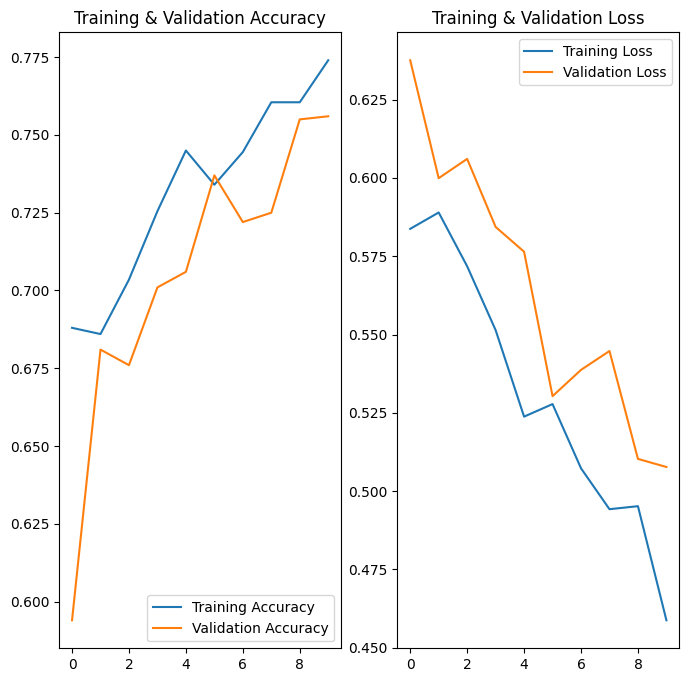

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()


In [13]:
model.save("cats_vs_dogs_cnn_model.h5")
from google.colab import files
files.download("cats_vs_dogs_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
model.save("cats_vs_dogs_cnn_model.h5")
from google.colab import files
files.download("cats_vs_dogs_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


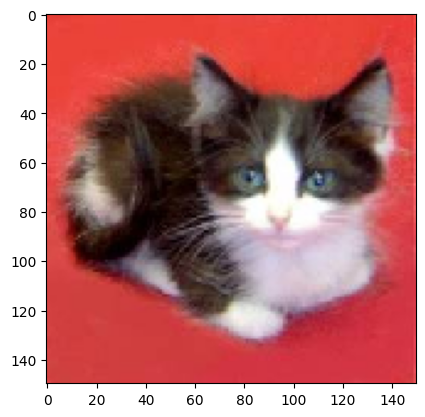

True label: 0.0
Predicted: 0.09


In [16]:
# Take one batch from the validation generator
batch = next(iter(validation_generator))

images, labels = batch
preds = model.predict(images)

# Show the first image + prediction
import matplotlib.pyplot as plt

plt.imshow(images[0])
plt.show()

print(f"True label: {labels[0]}")
print(f"Predicted: {preds[0][0]:.2f}")


In [17]:
from google.colab import files

uploaded = files.upload()


Saving cat.jpg.jpg to cat.jpg.jpg


In [19]:
from google.colab import files

files.download('cats_vs_dogs_cnn_model.keras')
# Or download your notebook: File > Download > Download .ipynb


FileNotFoundError: Cannot find file: cats_vs_dogs_cnn_model.keras